In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [68]:
data = pd.read_csv('Data.csv',parse_dates=True,index_col='timestamp')
data['time'] = data.index.hour

In [69]:
data.drop(['next','change','hl_diff','sma_5', 'sma_10', 'sma_20',],axis=1, inplace=True)

In [70]:
y = data.up_down.values

In [71]:
data.drop('up_down',axis=1,inplace=True)

In [72]:
X = data.values

In [73]:
list(data.columns)

['volume',
 'ask',
 'pc_ch_5',
 'pc_ch_10',
 'pc_ch_20',
 'sma5_ask_diff',
 'sma10_ask_diff',
 'sma20_ask_diff',
 'spread',
 'time']

## ml prototype

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
model = DecisionTreeClassifier(max_depth=5)

In [76]:
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [52]:
model.predict(X[5,:])

/home/data-sci/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [53]:
print(y[5],)

1


In [54]:
pred = model.predict(X)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(pred,y)

0.74755822689706986

In [78]:
model.n_features_

10

In [77]:
model.feature_importances_

array([ 0.00942402,  0.0223183 ,  0.06232034,  0.01888836,  0.01759472,
        0.80976749,  0.02387157,  0.01831775,  0.00417692,  0.01332054])

In [38]:
model.predict_proba([  3.69716327e+04,   2.55992000e-03,   1.70000000e+01,
          2.56767400e-03,   2.57209500e-03,   2.57210900e-03,
         -1.24704381e-03,  -6.75257486e-04,  -2.42543630e-04,
          7.75400000e-06,   1.21750000e-05,   1.21890000e-05,
          1.47120000e-04])

/home/data-sci/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.97468354,  0.02531646]])

In [27]:
alist = list(model.feature_importances_)

In [28]:
ind = [1 if i > 0 else 0 for i in alist]
ind

[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [29]:
data.columns.where(ind)

Index([             nan,            'ask',          'sma_5',              nan,
               'sma_20',        'pc_ch_5',       'pc_ch_10',       'pc_ch_20',
        'sma5_ask_diff', 'sma10_ask_diff', 'sma20_ask_diff',         'spread',
                 'time'],
      dtype='object')

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
model2 = GaussianNB()

In [32]:
model2.fit(X,y)

GaussianNB(priors=None)

In [33]:
pred = model2.predict(X)

In [34]:
accuracy_score(pred,y)

0.54019534184823437

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
model3 = RandomForestClassifier(n_estimators=1000)

In [81]:
model3.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [60]:
pred = model3.predict(X)

In [61]:
accuracy_score(pred,y)

1.0

In [34]:
d = pd.DataFrame({'feature_name':data.columns,'importance':model3.feature_importances_})

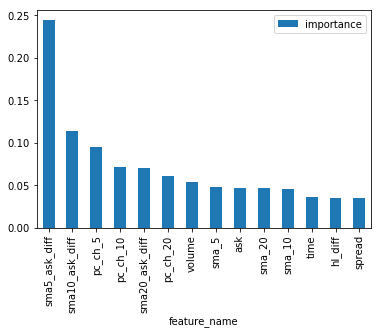

In [35]:
d = d.sort_values(by='importance',ascending=False)
d.set_index('feature_name',inplace=True)
d.plot(kind='bar')

In [36]:
model3.predict(X[5])

/home/data-sci/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [37]:
from sklearn.model_selection import cross_val_predict

In [38]:
cv_score = cross_val_predict(model3,X,y,cv=10)

In [39]:
accuracy_score(cv_score,y)

0.55071374906085646

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
model3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [87]:
pred = model3.predict(X_test)
accuracy_score(pred,y_test)

0.70875995449374285

### dimensionality reduction using principal component analysis for visulization 

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

In [45]:
pca.components_

array([[  1.00000000e+00,   7.79550669e-09,   2.46496421e-09,
          7.77236202e-09,   7.73813640e-09,   7.65720781e-09,
          3.74443893e-09,   4.17588490e-09,   4.83051059e-09,
         -2.31446761e-11,  -5.73702934e-11,  -1.38298879e-10,
          2.46496421e-09,   3.26353866e-07],
       [  3.26353902e-07,   1.17364631e-07,  -6.37690999e-07,
          1.88273766e-07,   1.84626996e-07,   1.60075708e-07,
         -7.77540063e-06,  -3.65147039e-06,   1.28882218e-06,
          7.09091341e-08,   6.72623648e-08,   4.27110762e-08,
         -6.37690999e-07,  -1.00000000e+00]])

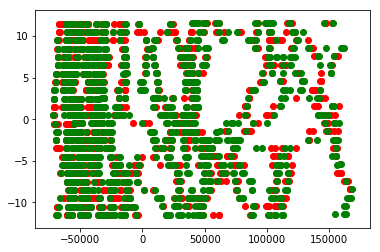

In [46]:
plt.scatter(pca_data[y==1][:,0],pca_data[y==1][:,1],color='r')
plt.scatter(pca_data[y==0][:,0],pca_data[y==0][:,1],color='g')

In [47]:
model3.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [85]:
temp = pd.read_csv('Data.csv',parse_dates=True,index_col='timestamp')
temp['time'] = data.index.hour

In [86]:
temp['pred'] = model3.predict(X)

In [87]:
temp['conf0'] = model3.predict_proba(X)[:,0]

In [88]:
temp['conf1'] = model3.predict_proba(X)[:,1]

In [89]:
temp['true'] = y

In [90]:
temp.to_csv('temp.csv')

In [82]:
import pickle

In [83]:
with open('etc.pickle','wb') as mod:
    pickle.dump(model3, mod)

In [112]:
import os

In [113]:
import sys